In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
f=open('data/application_train.csv')
app_train = pd.read_csv(f)

In [2]:
app_train.shape

(307511, 122)

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in app_train:
    if app_train[col].dtype == 'object':
        n=len(list(app_train[col].unique()))
        if n<=2:
            app_train[col]= le.fit_transform(app_train[col])
            print(col,n)

NAME_CONTRACT_TYPE 2
FLAG_OWN_CAR 2
FLAG_OWN_REALTY 2


In [13]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

In [14]:
app_train['DAYS_BIRTH_YEAR'] = app_train['DAYS_BIRTH']/365

In [17]:
import seaborn as sns

In [18]:
app_train['DAYS_BIRTH_YEAR_DISCRET'] = pd.cut(app_train['DAYS_BIRTH_YEAR'],10)

In [23]:
app_train['DAYS_BIRTH_YEAR_DISCRET'].value_counts().sort_index()

(20.469, 25.378]    13679
(25.378, 30.238]    33127
(30.238, 35.099]    38430
(35.099, 39.959]    41758
(39.959, 44.819]    40350
(44.819, 49.679]    34311
(49.679, 54.54]     33544
(54.54, 59.4]       32650
(59.4, 64.26]       27685
(64.26, 69.121]     11977
Name: DAYS_BIRTH_YEAR_DISCRET, dtype: int64

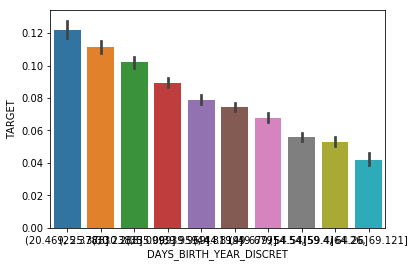

In [27]:
sns.barplot(app_train['DAYS_BIRTH_YEAR_DISCRET'],app_train['TARGET'])